In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("ME grossload metadata spliced 24 edited.xlsx")

In [4]:
data

,Date,Hour_Ending,ME_grs_ld,ME_temp,ME_rh,ME_ghi,ME_10m_lz_wnd_spd,Weekday
0,2021-01-01,1,1197.495,-1.229,66.124,0.0,3.800,5
1,2021-01-01,2,1159.892,-1.682,62.314,0.0,3.589,5
2,2021-01-01,3,1139.089,-2.576,66.512,0.0,3.452,5
3,2021-01-01,4,1138.617,-4.471,64.742,0.0,3.322,5
4,2021-01-01,5,1155.932,-4.580,72.185,0.0,3.228,5
...,...,...,...,...,...,...,...,...
4555,2023-12-29,20,1435.164,2.556,73.336,0.0,1.457,5
4556,2023-12-29,21,1374.607,2.118,85.141,0.0,1.424,5
4557,2023-12-29,22,1293.179,1.837,82.041,0.0,1.433,5
4558,2023-12-29,23,1203.674,0.722,89.926,0.0,1.482,5


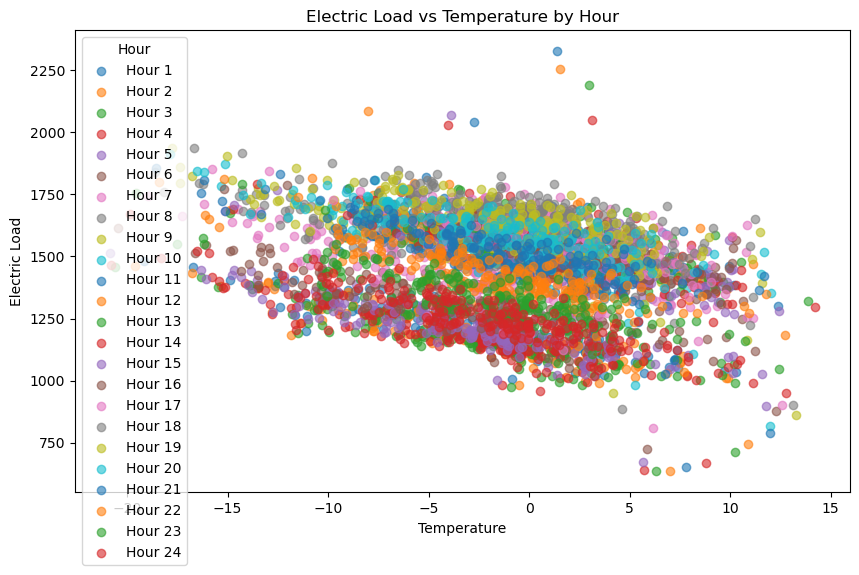

In [ ]:
plt.figure(figsize=(10, 6))
for hour in data["Hour_Ending"].unique():
    # Filter data for the specific hour
    hour_data = data[data["Hour_Ending"] == hour]
    plt.scatter(
        hour_data["ME_temp"], hour_data["ME_grs_ld"], label=f"Hour {hour}", alpha=0.6
    )
# Label axes and add legend
plt.xlabel("Temperature")
plt.ylabel("Gross Load")
plt.title("Gross Load vs Temperature by Hour")
plt.legend(title="Hour")
plt.show()

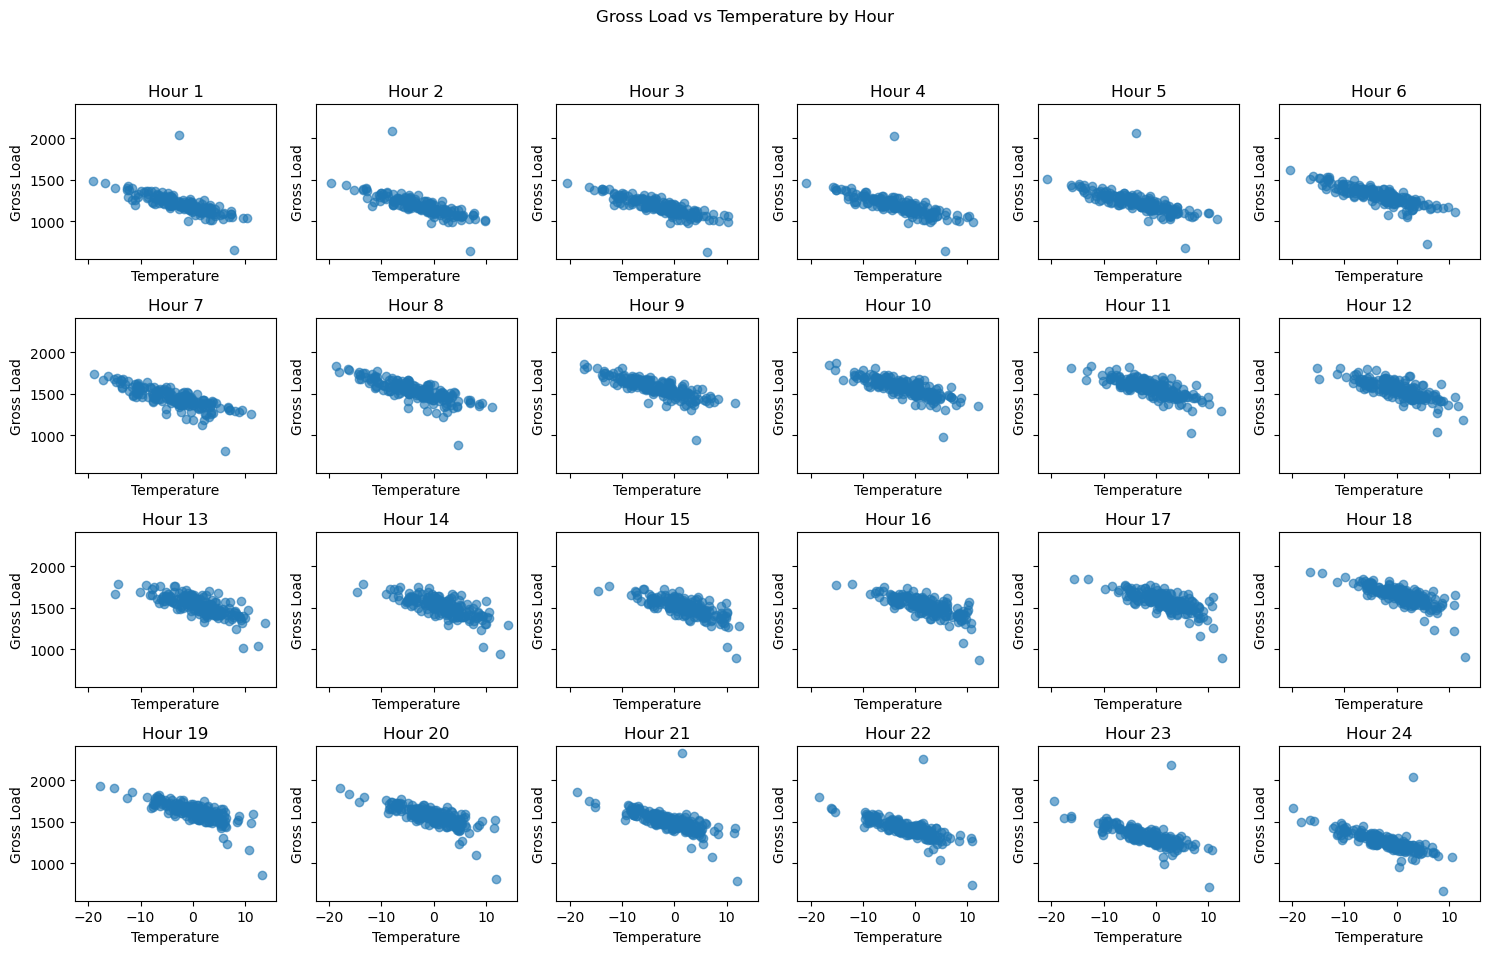

In [ ]:
rows = 4
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle("Gross Load vs Temperature by Hour")

# Flatten the axes array for easy indexing
axes = axes.flatten()

for hour in sorted(data["Hour_Ending"].unique()):
    ax = axes[hour - 1]
    hour_data = data[data["Hour_Ending"] == hour]
    ax.scatter(hour_data["ME_temp"], hour_data["ME_grs_ld"], alpha=0.6)
    ax.set_title(f"Hour {hour}")
    ax.set_xlabel("Temperature")
    ax.set_ylabel("Gross Load")

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import openpyxl

# Prepare a DataFrame to store regression results
results = pd.DataFrame(columns=["Hour", "Coefficient", "Intercept", "R_squared"])

# Loop through each hour and fit a regression model
for hour in sorted(data["Hour_Ending"].unique()):
    hour_data = data[data["Hour_Ending"] == hour]
    X = hour_data[["ME_temp"]].values  # Independent variable (temperature)
    y = hour_data["ME_grs_ld"].values  # Dependent variable (electric load)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Calculate R-squared
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)

    # Create a temporary DataFrame to store the current hour's results
    temp_df = pd.DataFrame(
        {
            "Hour": [hour],
            "Coefficient": [model.coef_[0]],
            "Intercept": [model.intercept_],
            "R_squared": [r_squared],
        }
    )

    # Concatenate the temporary DataFrame to the results DataFrame
    results = pd.concat([results, temp_df], ignore_index=True)

# Export results to Excel
results.to_excel("hourly_regression_results.xlsx", index=False)

C:\Users\afuzaylov\AppData\Local\Temp\ipykernel_40112\3573850209.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, temp_df], ignore_index=True)
